## Baseline results

### Single visit models --> train on ses2 data and predict on ses3 data

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results_dir = "/home/nikhil/projects/brain_changes/brain-diff/results/baseline_models/"
ses2_subdir = "freesurfer_age_prediction_2021-11-10T15:34:26.163051"
ses3_subdir = "freesurfer_age_prediction_2021-11-10T16:00:20.678190"


In [15]:
ses2_y_true_df = pd.read_csv(f"{results_dir}{ses2_subdir}/y_true.csv")
ses3_y_true_df = pd.read_csv(f"{results_dir}{ses3_subdir}/y_true.csv")

ses2_preds_df = pd.read_csv(f"{results_dir}{ses2_subdir}/predictions.csv")
ses3_preds_df = pd.read_csv(f"{results_dir}{ses3_subdir}/predictions.csv")
ses2_preds_df = ses2_preds_df.rename(columns={"0":"brainage_at_ses2"})
ses3_preds_df = ses3_preds_df.rename(columns={"0":"brainage_at_ses3"})

ses2_df = pd.merge(ses2_y_true_df,ses2_preds_df, on="eid")
ses3_df = pd.merge(ses3_y_true_df,ses3_preds_df, on="eid")

perf_df = pd.merge(ses2_df,ses3_df,on="eid")
perf_df["baseline_err"] = perf_df["brainage_at_ses2"] - perf_df["age_at_ses2"]
perf_df["followup_err"] = perf_df["brainage_at_ses3"] - perf_df["age_at_ses3"]

perf_df["brainage_delta"] = perf_df["brainage_at_ses3"] - perf_df["brainage_at_ses2"]
perf_df["chronoage_delta"] = perf_df["age_at_ses3"] - perf_df["age_at_ses2"]
perf_df["delta_err"] = perf_df["brainage_delta"] - perf_df["chronoage_delta"]

perf_df["Benjamin_Button"] = perf_df["brainage_at_ses3"] < perf_df["brainage_at_ses2"]

n_BBs = perf_df["Benjamin_Button"].sum()
print(f"n BBs: {n_BBs} ({100*n_BBs/len(perf_df):4.3f}%)")

perf_df_melt = perf_df.melt(id_vars=["eid", "age_at_ses2",	"brainage_at_ses2",	"age_at_ses3", "brainage_at_ses3", "chronoage_delta", "brainage_delta"], 
              value_vars=['baseline_err', 'followup_err', 'delta_err'],
              var_name='err_type', value_name='error')

n BBs: 443 (41.911%)


In [12]:
perf_df

,eid,age_at_ses2,brainage_at_ses2,age_at_ses3,brainage_at_ses3,baseline_err,followup_err,brainage_delta,chronoage_delta,delta_err,Benjamin_Button
0,4071544,66.0,64.227390,68.0,66.243569,-1.772610,-1.756431,2.016180,2.0,0.016180,False
1,6005293,61.0,66.174078,63.0,63.377519,5.174078,0.377519,-2.796559,2.0,-4.796559,True
2,1431231,59.0,61.581053,61.0,64.080243,2.581053,3.080243,2.499190,2.0,0.499190,False
3,5739520,61.0,65.838770,63.0,62.244870,4.838770,-0.755130,-3.593901,2.0,-5.593901,True
4,1433578,77.0,64.080243,80.0,69.384421,-12.919757,-10.615579,5.304177,3.0,2.304177,False
...,...,...,...,...,...,...,...,...,...,...,...
1052,2352732,52.0,63.484974,55.0,64.092045,11.484974,9.092045,0.607071,3.0,-2.392929,False
1053,3558150,66.0,64.414963,68.0,62.200620,-1.585037,-5.799380,-2.214343,2.0,-4.214343,True
1054,1080079,69.0,59.312380,72.0,60.031406,-9.687620,-11.968594,0.719026,3.0,-2.280974,False
1055,3223927,59.0,62.678381,61.0,64.080243,3.678381,3.080243,1.401863,2.0,-0.598137,False


## Plots

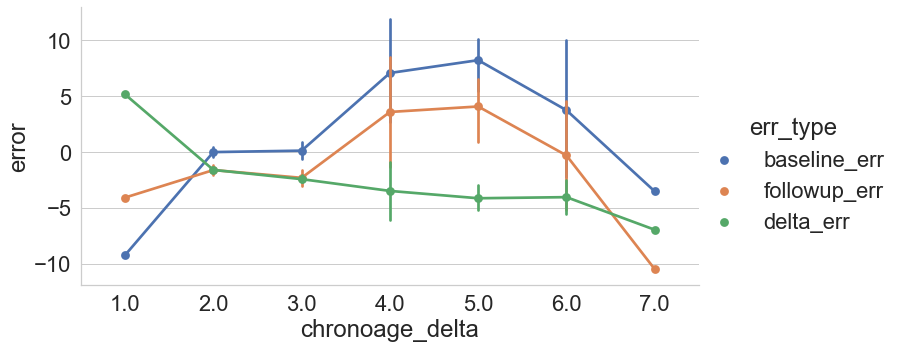

In [5]:
plot_df = perf_df_melt.copy()
sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    # fig, ax = plt.subplots(figsize=(20,10))
    g = sns.catplot(x="chronoage_delta",y="error", hue="err_type", kind="point", data=plot_df,aspect=2)

chronoage_delta  err_type    
1.0              baseline_err     9.228598
                 delta_err        5.147178
                 followup_err     4.081420
2.0              baseline_err     5.154600
                 delta_err        2.405464
                 followup_err     5.411493
3.0              baseline_err     4.874795
                 delta_err        2.959662
                 followup_err     5.282505
4.0              baseline_err     7.166418
                 delta_err        3.740933
                 followup_err     6.295865
5.0              baseline_err     8.928791
                 delta_err        4.143113
                 followup_err     5.708794
6.0              baseline_err     8.456662
                 delta_err        4.044197
                 followup_err     6.821430
7.0              baseline_err     3.528754
                 delta_err        6.961520
                 followup_err    10.490274
Name: abs_error, dtype: float64


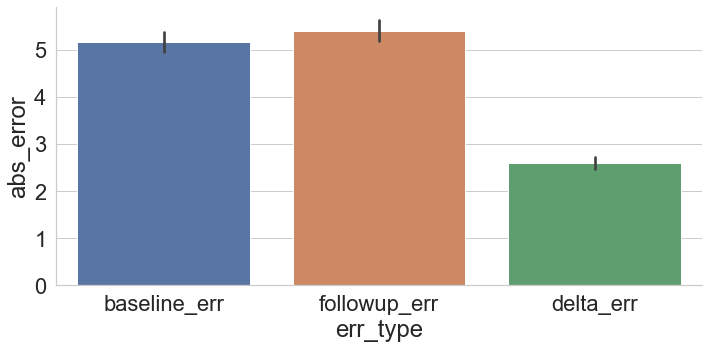

In [18]:
plot_df = perf_df_melt.copy()
plot_df["abs_error"] = np.abs(plot_df["error"]) 
print(plot_df.groupby(["chronoage_delta","err_type"]).mean()["abs_error"])

sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x="err_type",y="abs_error", kind="bar", data=plot_df,aspect=2)